In [1]:
import pandas as pd

In [136]:
df1 = pd.read_csv("../dados/22-11-2023_NEGOCIOSAVISTA_FLRY3_2359.csv", delimiter=";", decimal=",")
df2 = pd.read_csv("../dados/17-11-2023_NEGOCIOSAVISTA_FLRY3.csv", delimiter=";", decimal=",")
df3 = pd.read_csv("../dados/20-11-2023_NEGOCIOSAVISTA_FLRY3.csv", delimiter=";", decimal=",")
df4 = pd.read_csv("../dados/21-11-2023_NEGOCIOSAVISTA_FLRY3.csv", delimiter=";", decimal=",")

frames = [df1, df2, df3, df4]

df = pd.concat(frames)
df

,DataReferencia,CodigoInstrumento,AcaoAtualizacao,PrecoNegocio,QuantidadeNegociada,HoraFechamento,CodigoIdentificadorNegocio,TipoSessaoPregao,DataNegocio,CodigoParticipanteComprador,CodigoParticipanteVendedor
0,2023-11-22,FLRY3,0,17.01,100,100300025,10,1,2023-11-22,40,40
1,2023-11-22,FLRY3,0,17.01,700,100300025,20,1,2023-11-22,40,40
2,2023-11-22,FLRY3,0,17.01,200,100300025,30,1,2023-11-22,40,308
3,2023-11-22,FLRY3,0,17.01,100,100300025,40,1,2023-11-22,120,308
4,2023-11-22,FLRY3,0,17.01,200,100300025,50,1,2023-11-22,120,3
...,...,...,...,...,...,...,...,...,...,...,...
10373,2023-11-21,FLRY3,0,17.01,100,180600045,103740,1,2023-11-21,3,114
10374,2023-11-21,FLRY3,0,17.01,1400,180600045,103750,1,2023-11-21,3,238
10375,2023-11-21,FLRY3,0,17.01,2100,180600045,103760,1,2023-11-21,40,238
10376,2023-11-21,FLRY3,0,17.01,100,180600045,103770,1,2023-11-21,40,238


In [137]:
df['HoraFechamento'] = df['HoraFechamento'].astype(str)
df['HoraFechamento'] = df['HoraFechamento'].apply(lambda x: x[0:4])
df['DataNegocio'] = df['DataNegocio'].apply(lambda x: x.replace('-', ''))
df['HoraFechamento'] = df['HoraFechamento'] + df['DataNegocio']
df['HoraFechamento'] = pd.to_datetime(df['HoraFechamento'], format="%H%M%Y%m%d")
df.drop(columns=['DataNegocio'], axis=1, inplace=True)
df

,DataReferencia,CodigoInstrumento,AcaoAtualizacao,PrecoNegocio,QuantidadeNegociada,HoraFechamento,CodigoIdentificadorNegocio,TipoSessaoPregao,CodigoParticipanteComprador,CodigoParticipanteVendedor
0,2023-11-22,FLRY3,0,17.01,100,2023-11-22 10:03:00,10,1,40,40
1,2023-11-22,FLRY3,0,17.01,700,2023-11-22 10:03:00,20,1,40,40
2,2023-11-22,FLRY3,0,17.01,200,2023-11-22 10:03:00,30,1,40,308
3,2023-11-22,FLRY3,0,17.01,100,2023-11-22 10:03:00,40,1,120,308
4,2023-11-22,FLRY3,0,17.01,200,2023-11-22 10:03:00,50,1,120,3
...,...,...,...,...,...,...,...,...,...,...
10373,2023-11-21,FLRY3,0,17.01,100,2023-11-21 18:06:00,103740,1,3,114
10374,2023-11-21,FLRY3,0,17.01,1400,2023-11-21 18:06:00,103750,1,3,238
10375,2023-11-21,FLRY3,0,17.01,2100,2023-11-21 18:06:00,103760,1,40,238
10376,2023-11-21,FLRY3,0,17.01,100,2023-11-21 18:06:00,103770,1,40,238


<Axes: ylabel='Frequency'>

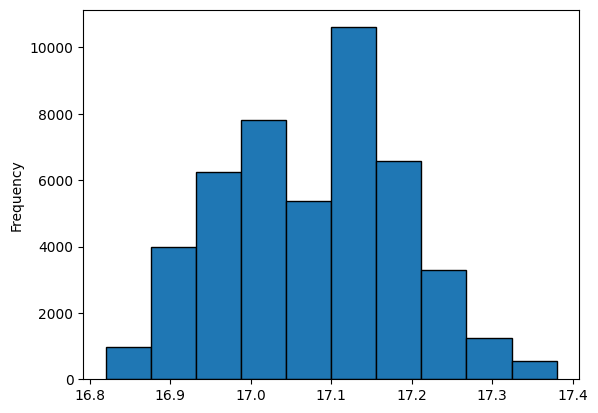

In [145]:
df['PrecoNegocio'].plot(kind='hist', edgecolor='black')

<Axes: ylabel='Frequency'>

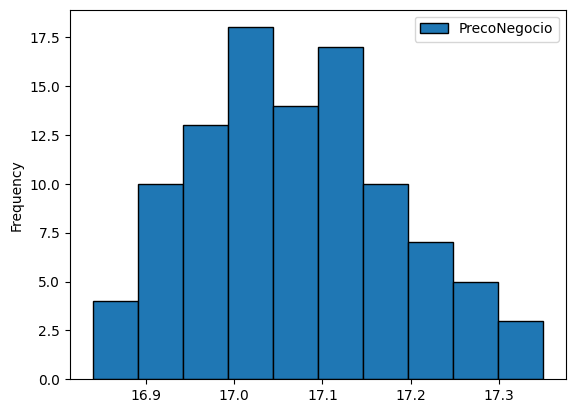

In [160]:
#df.groupby(pd.Grouper(key='HoraFechamento', freq='15T'))['PrecoNegocio'].mean().plot(kind='hist', edgecolor='black')
df.sort_values(by=['HoraFechamento']).groupby(pd.Grouper(key='HoraFechamento', freq='20T'))[['PrecoNegocio', 'HoraFechamento']].last().plot(kind='hist', edgecolor='black')